In [3]:
import math
import pandas as pd
import numpy as np
import logging
logging.basicConfig(filename='data_visualization.py',level=logging.INFO)

from equation_parser import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from scipy.optimize import minimize
import shap

#shap.initjs()
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

def get_adult_data():
    X, Y = shap.datasets.adult()
    sensitive_attribute = 'Sex'

    T = X[sensitive_attribute]
    X = pd.get_dummies(X)

    sc = StandardScaler()
    X_scaled = sc.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

    le = LabelEncoder()
    Y = le.fit_transform(Y)

    X = X_scaled.reset_index(drop=True)
    T = T.reset_index(drop=True)
    X = pd.DataFrame(X)
    T = pd.Series(T)
    Y = pd.Series(Y)
    All = pd.concat([X, Y, T], axis = 1)
    return X, Y, T

In [4]:
X, Y, T = get_adult_data()

In [5]:
print(X.shape, Y.shape, T.shape)

(32561, 12) (32561,) (32561,)


In [8]:
#male
male_Y = Y[T.astype(str) == '1']
#female
female_Y = Y[T.astype(str) == '0']

print("Male datapoints: ", male_Y.shape[0])
print("Female datapoints: ", female_Y.shape[0])
print("Total datapoints: ", male_Y.shape[0] + female_Y.shape[0])

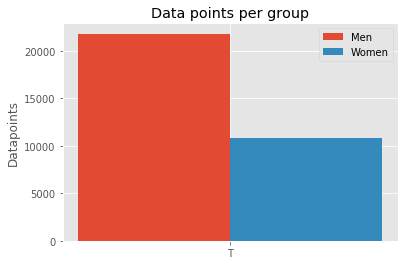

In [33]:
import numpy as np

N = 1
men_means = (male_Y.shape[0])
women_means = (female_Y.shape[0])
width = 0.2
ind = np.arange(N)      
plt.bar(ind, men_means, width, label='Men')
plt.bar(ind + width, women_means, width,
    label='Women')

plt.ylabel('Datapoints')
plt.title('Data points per group')

# plt.xticks(1, (''))
plt.xticks(ind+width/2, ('Total group'))
plt.legend(loc='best')
plt.show()

In [21]:
#male
male_Y_positive = male_Y[male_Y.astype(str) == '1']
male_Y_negative = male_Y[male_Y.astype(str) == '0']

#female
female_Y_positive = female_Y[female_Y.astype(str) == '1']
female_Y_negative = female_Y[female_Y.astype(str) == '0']


print("Male datapoints positive: ", male_Y_positive.shape[0])
print("Male datapoints negative: ", male_Y_negative.shape[0])
print("Male datapoints: ", male_Y.shape[0])
print("Female datapoints positive: ", female_Y_positive.shape[0])
print("Female datapoints negative: ", female_Y_negative.shape[0])
print("Female datapoints: ", female_Y.shape[0])
# print("Total datapoints: ", male_Y.shape[0] + female_Y.shape[0])

Male datapoints positive:  6662
Male datapoints negative:  15128
Male datapoints:  21790
Female datapoints positive:  1179
Female datapoints negative:  9592
Female datapoints:  10771


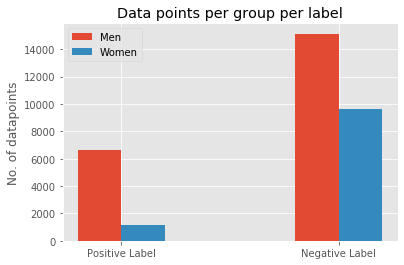

In [26]:
import numpy as np

N = 2
men_means = (male_Y_positive.shape[0], male_Y_negative.shape[0])
women_means = (female_Y_positive.shape[0], female_Y_negative.shape[0])
width=0.2
ind = np.arange(N)      
plt.bar(ind, men_means, width, label='Men')
plt.bar(ind + width, women_means, width,
    label='Women')

plt.ylabel('No. of datapoints')
plt.title('Data points per group per label')

plt.xticks(ind + width/2, ('Positive Label', 'Negative Label'))
plt.legend(loc='best')
plt.show()